In [37]:
from datasets import load_dataset
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
#load datasets
tiny_codes = load_dataset('tiny-codes')
codeparrot_clean = load_dataset('codeparrot-clean')

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/111 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/108 [00:00<?, ?it/s]

In [9]:
tiny_codes_df = pd.DataFrame(tiny_codes['train'][1:100000])
codeparrot_clean_df = pd.DataFrame(codeparrot_clean['train'][1:100000])

In [12]:
tiny_codes_df.head()

,prompt,main_topic,subtopic,adjective,action_verb,scenario,target_audience,programming_language,common_sense_topic,idx,response
0,Build a Rust module snippet that Displays Extr...,Security,Access Control,Extreme,Display,for Decision Making,Beginners,Rust,Safety,1109988,Here is a possible implementation of such a fu...
1,Write a Ruby code snippet to Check High Food h...,Food hygiene,Cleaning Fruits and Vegetables,High,Check,for Engineer,Experts,Ruby,Trust,1881323,Here’s some sample ruby code which implements ...
2,Develop a C# program snippet to Update Low Onl...,Online Shopping,Product Availability,Low,Update,for Analysis,Experts,C#,Privacy,780696,Here's some sample code that demonstrates how ...
3,Develop a Julia program snippet to Display Hig...,Eye hygiene,Managing Eye Irritation,High,Display,for Engineer,Experts,Julia,Safety,131131,Here is a possible implementation of this func...
4,Build a Bash module snippet that Checks Extrem...,Sneezing and coughing etiquette,Proper Disposal of Tissues,Extreme,Check,for Engineer,Beginners,Bash,Responsibility,1872152,Here's a bash script that implements a simple ...


In [11]:
codeparrot_clean_df.head()

,repo_name,path,copies,size,content,license,hash,line_mean,line_max,alpha_frac,autogenerated
0,ifduyue/django,django/core/checks/registry.py,13,3108,from itertools import chain\n\nfrom django.uti...,bsd-3-clause,-2035686896372967697,30.714286,91,0.602317,False
1,kmike/scikit-learn,sklearn/utils/__init__.py,3,10094,"""""""\nThe :mod:`sklearn.utils` module includes ...",bsd-3-clause,2334709577611160651,26.883978,79,0.568060,False
2,houlixin/BBB-TISDK,linux-devkit/sysroots/i686-arago-linux/usr/lib...,593,13942,""""""" Python Character Mapping Codec cp1250 gene...",gpl-2.0,-6356832018515182181,44.413681,119,0.550351,False
3,dataxu/ansible,lib/ansible/modules/system/kernel_blacklist.py,125,4009,#!/usr/bin/python\n# encoding: utf-8 -*-\n\n# ...,gpl-3.0,8498771084445726761,24.864516,92,0.575206,False
4,163gal/Time-Line,libs_arm/wx/_controls.py,2,332374,# This file was created automatically by SWIG ...,gpl-3.0,-3839353247363315950,41.465057,151,0.655030,False


In [19]:
tiny_code_shape, codeparrot_shape = tiny_codes_df.shape, codeparrot_clean_df.shape
print(tiny_code_shape, codeparrot_shape)

(99999, 11) (99999, 11)


In [33]:
tiny_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prompt                99999 non-null  object
 1   main_topic            99999 non-null  object
 2   subtopic              99999 non-null  object
 3   adjective             99999 non-null  object
 4   action_verb           99999 non-null  object
 5   scenario              99999 non-null  object
 6   target_audience       99999 non-null  object
 7   programming_language  99999 non-null  object
 8   common_sense_topic    99999 non-null  object
 9   idx                   99999 non-null  int64 
 10  response              99999 non-null  object
dtypes: int64(1), object(10)
memory usage: 8.4+ MB


In [34]:
codeparrot_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   repo_name      99999 non-null  object 
 1   path           99999 non-null  object 
 2   copies         99999 non-null  object 
 3   size           99999 non-null  object 
 4   content        99999 non-null  object 
 5   license        99999 non-null  object 
 6   hash           99999 non-null  int64  
 7   line_mean      99999 non-null  float64
 8   line_max       99999 non-null  int64  
 9   alpha_frac     99999 non-null  float64
 10  autogenerated  99999 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 7.7+ MB


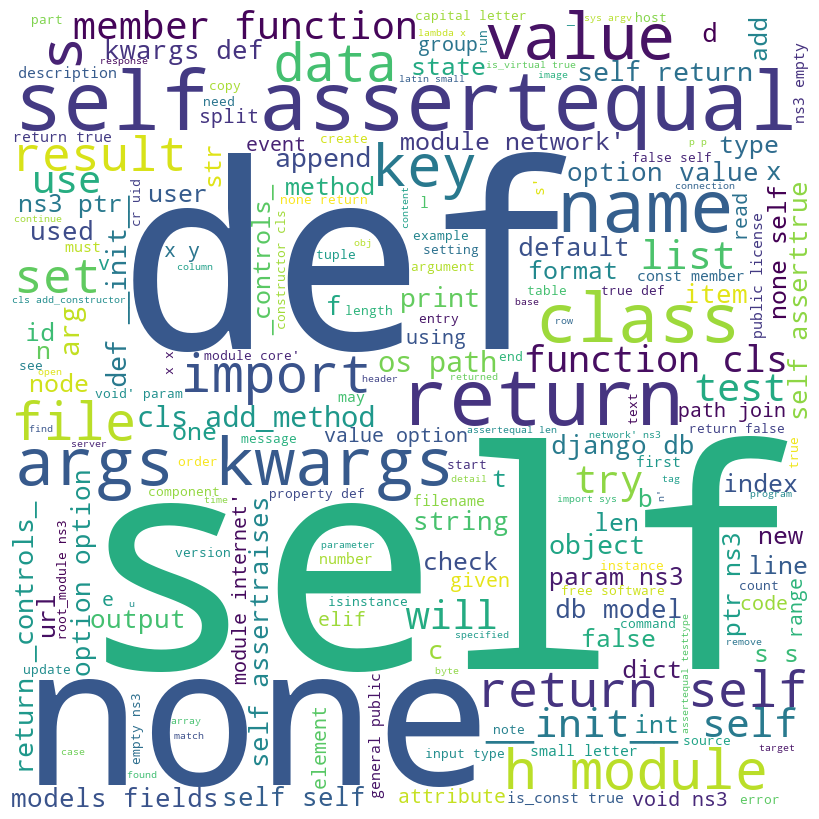

In [41]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in codeparrot_clean_df[1:1000].content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

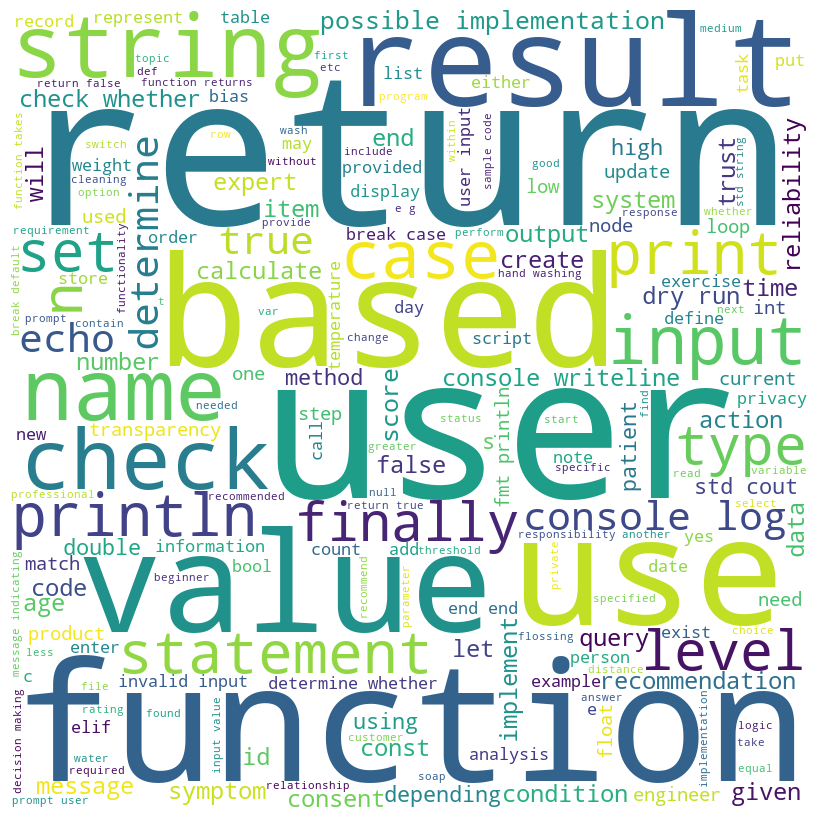

In [44]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in tiny_codes_df[1:1000].response:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()